In [82]:
#read and inspect data
import pandas as pd                
import numpy as np  
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv'

df = pd.read_csv(path, header=0)
df1 = df.loc[:, ['natenvir', 'natenrgy', 'consci',           # dv
          'polviews',                                       # iv
          "age", 'sex', 'race', 'educ',                      # controls
         ]]

df1.head()
df1.shape 

df1.isnull().sum()    

df_copy = df1 
df2 = df1.dropna()

df2.shape

print(df2.groupby('natenvir').size())
print(df2.groupby('natenrgy').size())
print(df2.groupby('consci').size())
df2.groupby('polviews').size()

#print(df2.polviews.unique())

df2.polviews = pd.Categorical(df2.polviews, 
            categories=['ExtrmLib', 'Liberal', 'SlghtLib', 'Moderate', 'SlghtCons', 'Conserv', 'ExtrmCons'], 
            ordered=True)

#print(df2.polviews.unique())
#print(df2.polviews.cat.codes.unique())    

def polviews1(x):                                 
    '''
    INPUT: 
    x: variable categories: slightcons, mod, lib, slightlib, conserv, extrmcons, extrmlib; unique codes are 4,3,1,2,5,6,0
    
    OUTPUT:
    4,5,6 recoded to 'Conservatives'
    3 recoded to 'Moderates'
    0,1,2 = 'Liberals' 
    '''
    if x >=0:
        if x <= 2:
            return 'Liberal'
        elif x == 3:
            return 'Moderate'
        elif x > 3:
            return 'Conservative'
    else:
        return np.nan

df2['polviews1'] = df2.polviews.cat.codes.apply(polviews1)  

print(df2[['polviews', 'polviews1']])
print(df2.polviews1.unique())
print(df2.groupby('polviews1').size())



natenvir
About right    182
Too little     336
Too much        67
dtype: int64
natenrgy
About right    170
Too little     350
Too much        65
dtype: int64
consci
A GREAT DEAL    252
HARDLY ANY       50
ONLY SOME       283
dtype: int64
       polviews     polviews1
2     SlghtCons  Conservative
6      Moderate      Moderate
9       Liberal       Liberal
15     SlghtLib       Liberal
17      Conserv  Conservative
...         ...           ...
1956    Liberal       Liberal
1959    Liberal       Liberal
1961   Moderate      Moderate
1970   Moderate      Moderate
1973   Moderate      Moderate

[585 rows x 2 columns]
['Conservative' 'Moderate' 'Liberal']
polviews1
Conservative    189
Liberal         180
Moderate        216
dtype: int64


/Users/jed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-82-b06c9d482a5c>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['polviews1'] = df2.polviews.cat.codes.apply(polviews1)


### Univariate Analysis

Text(0, 0.5, 'Sentiment towards Spending on Environment')

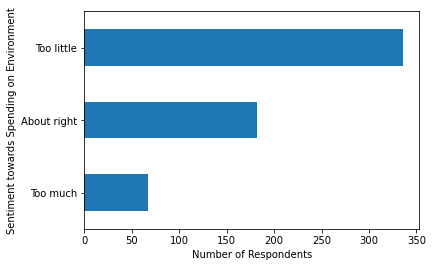

In [98]:
df2.natenvir.unique()     
df2.groupby('natenvir').size().sort_values(ascending=True).plot(kind='barh')            
plt.xlabel('Number of Respondents')
plt.ylabel('Sentiment towards Spending on Environment')

Text(0, 0.5, 'Sentiment towards Spending on Alternative Energy Resources')

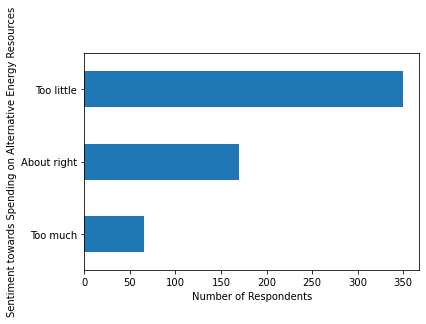

In [91]:
df2.natenrgy.unique()     
df2.groupby('natenrgy').size().sort_values(ascending=True).plot(kind='barh')            
plt.xlabel('Number of Respondents')
plt.ylabel('Sentiment towards Spending on Alternative Energy Resources')

Text(0, 0.5, 'Confidence in Scientific Community')

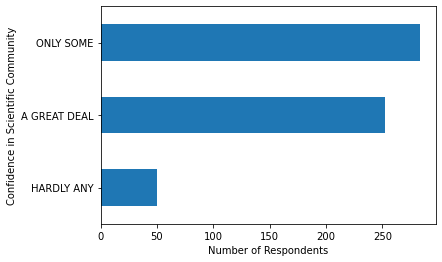

In [92]:
df2.consci.unique()     
df2.groupby('consci').size().sort_values(ascending=True).plot(kind='barh')     
plt.xlabel('Number of Respondents')
plt.ylabel('Confidence in Scientific Community')

Text(0, 0.5, 'Political Views')

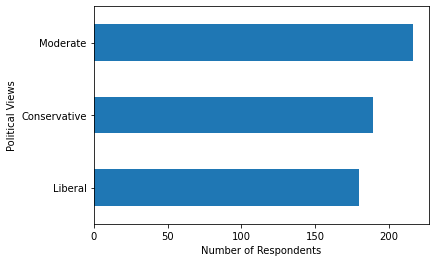

In [93]:
df2.polviews1.unique() 
df2.groupby('polviews1').size().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Number of Respondents')
plt.ylabel('Political Views')

### Bivariate Analysis: 

Text(0, 0.5, 'Political Views')

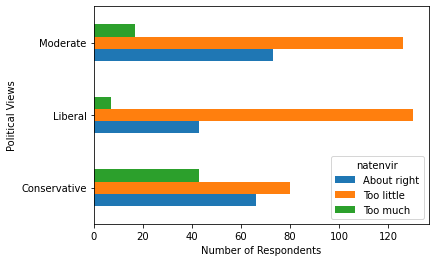

In [99]:
df2.groupby(['natenvir', 'polviews1']).size()
df2.pivot_table(values="sex",
                index="polviews1",                    
                columns="natenvir",
                aggfunc='count').plot(kind='barh')
plt.xlabel('Number of Respondents')
plt.ylabel('Political Views')

Text(0, 0.5, 'Political Views')

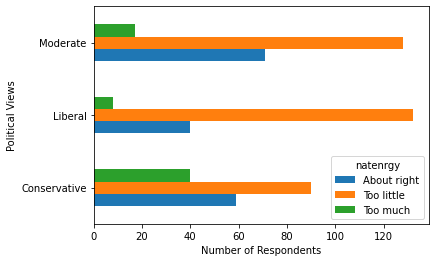

In [100]:
df2.groupby(['natenrgy', 'polviews1']).size()
df2.pivot_table(values="sex",
                index="polviews1",                    
                columns="natenrgy",
                aggfunc='count').plot(kind='barh')
plt.xlabel('Number of Respondents')
plt.ylabel('Political Views')

Text(0, 0.5, 'Political Views')

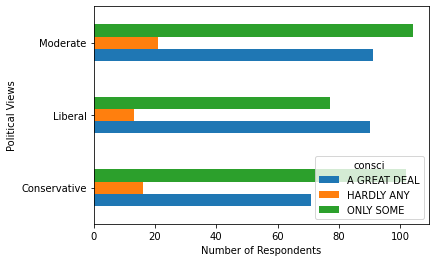

In [101]:
df2.groupby(['consci', 'polviews1']).size()
df2.pivot_table(values="sex",
                index="polviews1",                    
                columns="consci",
                aggfunc='count').plot(kind='barh')
plt.xlabel('Number of Respondents')
plt.ylabel('Political Views')

### Discussion 

My biggest expectation for the data was that more Conservatives would lean towards the government spending too much on the environment and alternate energy resources. I was surprised to find out that all three political groups were primarily in the opinion that the government spends too little on both issues. Another assumption I had was that respondents would be in the middle in regards to their confidence in the scientific community. The data aligned with this assumption in that the highest proportion of responses leaned towards *"Only Some"* confidence in the scientific community, which is in between *"A Great Deal"* and *"Hardly Any".*

As mentioned, most respondents across all three political groups believed that there was too little money being spent on the environment or alternative energy sources. Looking more into the three groups, there were more Conservatives who believed there was too much money being spent. Bigger differences can be seen more in the respondents' confidence in the scientific community. Liberals had the highest proportion of responses that felt they had *A Great Deal* of confidence in the community. For Conservatives, they had more respondents that felt they had *Only Some* confidence in the community. Moderates also had more respondents that felt they had *Only Some* confidence. However, across all three groups, the proportion of people who had hardly any confidence were in the minority. 

As I added during the inspection, I think **age, sex, race, and education** are valid controls for this analysis. However, it would be interesting to add **religon** as a control as well. I expect to see that with age, we will see more Liberals in the younger age brackets, while more Conservatives in the older age brackets. With education, I expect to see respondents with higher educational attainment to believe that there is too little being spent on the environment and alternative energy resources. I would also expect confidence in the scientific community to be higher with higher educational attainmment. I would also expect to see race and religion have a similar effect. Races who have higher religious compositions may be more inclined to have less confidence in the scientific community and believe spending on environment and energy are too much. 